# Лабораторная работа №4: Частотный анализ формул численного интегрирования


Выполнили студенты гр. 1381 Ковалёв Павел Андреевич и Богданов Егор Михайлович. 

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования

## Основные теоретические положения
Формула трапеций:
$$y_{n+1}=y_n+\frac{1}{2}(s_n+s_{n+1}),y_0=0$$
Формула прямоугольников
$$y_{n+1}=y_n+s_{n+0.5},y_0=0$$
Формула Симпсона
$$y_{n+1}=y_{n-1}+\frac{1}{3}(s_{n-1}+4s_n+s_{n+1}),y_0=0$$
Формула "$\frac{3}{8}$":
$$y_{n+2}=y_{n-1}+\frac{1}{8}(x_{n+2}+3x_{n+1}+3x_n+x_{n-1})$$
Формула для $\gamma$:
$$\gamma=\frac{\tilde{H}(f)*y_n}{(\frac{e^{i\omega t}}{i\omega})}$$
Связь частот:
$$\omega=2\pi f$$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $ \tilde {H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.
### Порядок выполнения работы
1)Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.

2)Вывести формулу передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8»:

$y_{n+2}=y_{n−1}+18(x_{n+2}+3x_{n+1}+3x_n+x_{n−1}).$

3)Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.

4)Провести сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2.Сделать выводы.
 



## Выполнение работы

### Задание 1
#### Формула трапеций

Пусть $s_n=e^{i \omega n}$ и $y_n=H(\omega)e^{i \omega n}$. $\tilde{H}(f)$ можно найти из следующей системы: 
\begin{cases}
Y_{n+1} = \tilde{H}(f) e^{i \omega n} + \frac{e^{i \omega n}*e^{i \omega (n+1)}}{2}\\
Y_{n+1} = \tilde{H}(f) e^{i \omega (n+1)}
\end{cases}


In [41]:
import sympy as sp
y, H, n, omega = sp.symbols('y H n omega')
Y_1 = H * sp.exp(sp.I * omega * n) + 1/2 * (sp.exp(sp.I * omega * n) + sp.exp(sp.I * omega * (n + 1)))
Y_2 = H * sp.exp(sp.I * omega * (n + 1))
h = sp.solve(Y_1 - Y_2, H)
print(h)


[-0.5*I/tan(0.5*omega)]


Используя $\omega = 2 \pi f$,построим график $\tilde{H}(f)=\frac{-0.5i}{tg(\pi f)}$

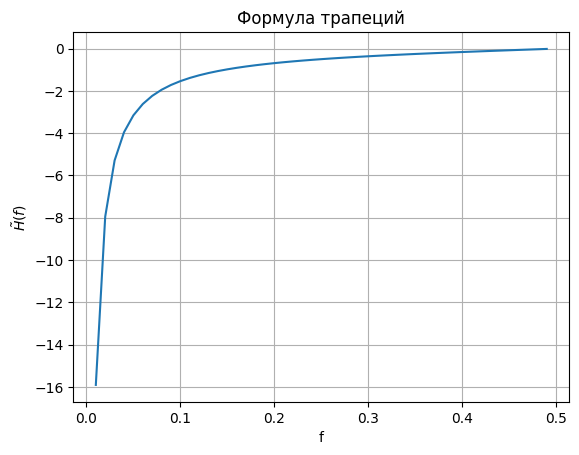

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math as Math

def H(f):
    return -1/(2*np.tan(np.pi*f))

X=[]
Y=[]

for i in range(1,50):
    X.append(i/100)
    Y.append(H(i/100))
plt.xlabel("f")
plt.ylabel(r'$ \tilde{H}(f) $')
plt.plot(X,Y)
plt.grid(True)
plt.title("Формула трапеций")
plt.show()
    

График для $\gamma=\frac{\tilde{H}(f)*e^{2i\pi nf }}{(\frac{e^{2i\pi f n}}{2i\pi f})}=\frac{\pi f}{tg(\pi f)}$:

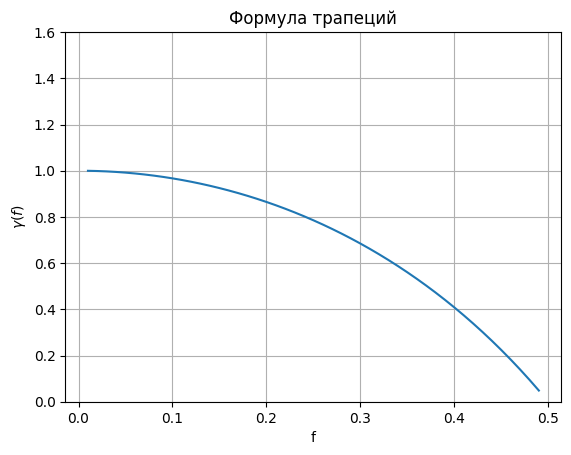

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import math as Math
def Gamma(f):
    return np.pi*f/np.tan(np.pi*f)

Xg=[]
Yg=[]
for i in range(1,50):
    Xg.append(i/100)
    Yg.append(Gamma(i/100))
plt.plot(Xg,Yg)
plt.ylim(0, 1.6)
plt.xlabel("f")
plt.ylabel(r'$ \gamma (f) $')
plt.plot(X,Y)
plt.title("Формула трапеций")
plt.grid(True)
plt.show()

    

#### Формула прямоугольников

Аналогично моджно найти $\tilde{H}(f)$ можно найти из следующей системы: 
\begin{cases}
Y_{n+1} = \tilde{H}(f) e^{i \omega n} + e^{i \omega (n+0.5)} \\
Y_{n+1} = \tilde{H}(f) e^{i \omega (n+1)}
\end{cases}

In [60]:
import sympy as sp
y, H, n, omega = sp.symbols('y H n omega')
Y_1 = H*sp.exp(sp.I*omega*n)+sp.exp(sp.I*omega*(n+0.5))
Y_2 = H * sp.exp(sp.I * omega * (n + 1))
h = sp.solve(Y_1 - Y_2, H)
print(h)


[-0.5*I/sin(0.5*omega)]


График для $\tilde{H}(f)=\frac{-0.5i}{sin(\pi f)}$:

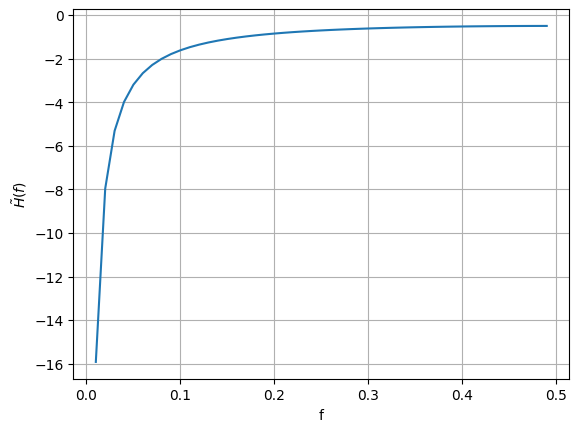

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import math as Math

def H(f):
    return -1/(2*np.sin(np.pi*f))

X=[]
Y=[]

for i in range(1,50):
    X.append(i/100)
    Y.append(H(i/100))
plt.xlabel("f")
plt.ylabel(r'$ \tilde{H}(f) $')
plt.plot(X,Y)
plt.grid(True)
plt.show()
    

График для $\gamma=\frac{\tilde{H}(f)*e^{2i\pi f }}{(\frac{e^{2i\pi f }}{2i\pi f})}=\frac{\pi f}{sin(\pi f)}$:

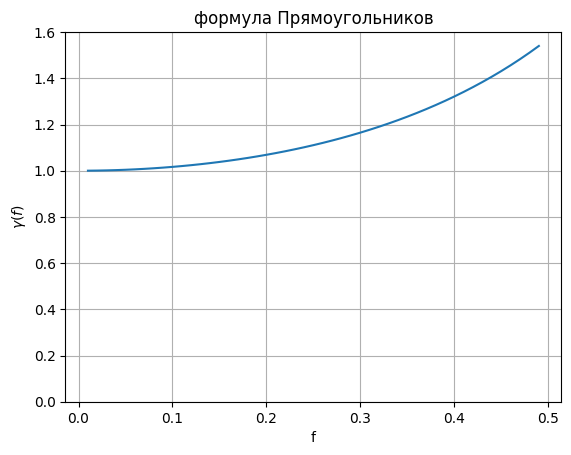

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import math as Math
def Gamma(f):
    return np.pi*f/np.sin(np.pi*f)

Xg=[]
Yg=[]
for i in range(1,50):
    Xg.append(i/100)
    Yg.append(Gamma(i/100))
plt.plot(Xg,Yg)
plt.ylim(0, 1.6)
plt.xlabel("f")
plt.ylabel(r'$ \gamma (f) $')
plt.plot(X,Y)
plt.title("формула Прямоугольников")
plt.grid(True)
plt.show()

    

#### Формула Симпсона

Найдём $\tilde{H}(f)$  из следующей системы: 
\begin{cases}
Y_{n+1} = \tilde{H}(f) e^{i \omega (n-1)} + \frac{1}{3}( e^{i \omega (n-1) }+4*e^{i \omega n}+e^{i \omega (n+1) }) \\
Y_{n+1} = \tilde{H}(f) e^{i \omega (n+1)}
\end{cases}

In [57]:
import sympy as sp
y, H, n, omega = sp.symbols('y H n omega')
Y_1 = H*sp.exp(sp.I*omega*(n-1))+1/3*(sp.exp(sp.I*omega*(n-1))+4*sp.exp(sp.I*omega*n)+sp.exp(sp.I*omega*(n+1)))
Y_2 = H * sp.exp(sp.I * omega * (n + 1))
h = sp.solve(Y_1 - Y_2, H)
print(h)


[(4.0*exp(I*omega) + exp(2.0*I*omega) + 1.0)/(3.0*exp(2.0*I*omega) - 3.0)]


График для $\tilde{H}(f)=\frac{4e^{i 2\pi f}+e^{4i \pi f}+1}{3e^{4i \pi f}-3}=\frac{e^{i2\pi f}+4+e^{-i2\pi f}}{3(e^{i2\pi f}-e^{-i2\pi f})}$:

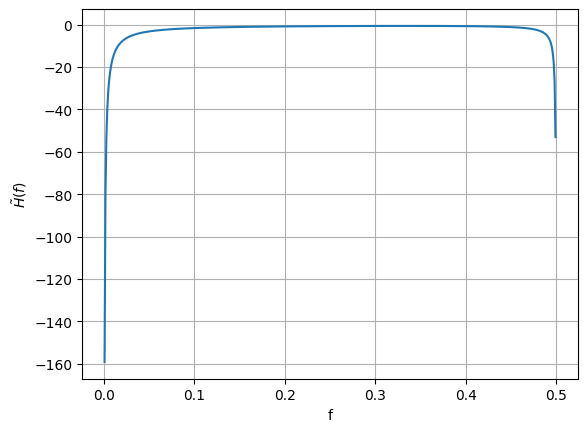

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math as Math

def H(f):
    up=np.exp(2*np.pi*f*1j)+4+np.exp(-2*np.pi*f*1j)
    lw=3*(np.exp(2*np.pi*f*1j)-np.exp(-2*np.pi*f*1j))
    return up/lw


X=[]
Y=[]

for i in range(1,500):
    X.append(i/1000)
    Y.append(np.imag(H(i/1000)))
plt.xlabel("f")
plt.ylabel(r'$ \tilde{H}(f) $')
plt.plot(X,Y)
plt.grid(True)
plt.show()
    